In [1]:
library(tidyverse)
library(data.table)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




## DNE

### ColocBoost

In [2]:
image_cb <- fread("~/project/image_QTL/DNE_cb_explained_by_xQTL/Image_meta_colocboost_export_filtered_ucos.bed")
head(image_cb)

#chr,start,end,a1,a2,variant_ID,region_ID,event_ID,cos_ID,vcp,cos_npc,min_npc_outcome,coef,z
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr1,214963879,214963879,C,A,chr1:214963879:A:C,chr1_214114077_215979204,image_Aging3; image_Aging4,chr1_214114077_215979204:cos1:y5_y6,0.308998229,1.0000,1.0000,-0.00295357552328793;-0.00350825537272619,-7.05591585332122;-7.83062096093714
chr1,214966544,214966544,T,A,chr1:214966544:A:T,chr1_214114077_215979204,image_Aging3; image_Aging4,chr1_214114077_215979204:cos1:y5_y6,0.551378710,1.0000,1.0000,-0.0045110686509308;-0.00497147409598806,-7.11983187553063;-7.86924422401098
chr1,214968227,214968227,T,C,chr1:214968227:C:T,chr1_214114077_215979204,image_Aging3; image_Aging4,chr1_214114077_215979204:cos1:y5_y6,0.139518722,1.0000,1.0000,-0.00245884110595507;-0.00145974662852431,-7.00267955746628;-7.63714115547905
chr1,236230893,236230893,A,G,chr1:236230893:G:A,chr1_235656952_237008086,image_AD2; image_Aging4,chr1_235656952_237008086:cos1:y1_y5,0.011843439,0.9712,0.9712,0.000109647171223616;-4.90719712964009e-05,4.19283889654175;-3.40467226319757
chr1,236231824,236231824,G,A,chr1:236231824:A:G,chr1_235656952_237008086,image_AD2; image_Aging4,chr1_235656952_237008086:cos1:y1_y5,0.009205362,0.9712,0.9712,9.15977434295378e-05;-4.19788158719159e-05,4.13503630444023;-3.34741920051326
chr1,236232553,236232553,C,T,chr1:236232553:T:C,chr1_235656952_237008086,image_AD2; image_Aging4,chr1_235656952_237008086:cos1:y1_y5,0.009599897,0.9712,0.9712,9.53920530452249e-05;-4.26288587857485e-05,4.14766738902267;-3.35272152488867


In [14]:
a = image_cb |> group_by(cos_ID, event_ID) |> count() |> arrange(desc(n))  |> filter(n>100)
a |> group_by(event_ID) |> count()

event_ID,n
<chr>,<int>
image_AD1,5
image_AD1; image_Aging3,1
image_AD1; image_Aging5,1
image_AD2,1
image_AD2; image_Aging2,1
image_Aging1,8
image_Aging2,4
image_Aging3,3
image_Aging4,6


Trait: image_AD1 
  UCOS variants: 1255 
  COS variants: 752 
  Total variants: 2007 

Trait: image_AD2 
  UCOS variants: 799 
  COS variants: 630 
  Total variants: 1429 

Trait: image_Aging1 
  UCOS variants: 2219 
  COS variants: 429 
  Total variants: 2648 

Trait: image_Aging2 
  UCOS variants: 1396 
  COS variants: 516 
  Total variants: 1912 

Trait: image_Aging3 
  UCOS variants: 2987 
  COS variants: 713 
  Total variants: 3700 

Trait: image_Aging4 
  UCOS variants: 1559 
  COS variants: 504 
  Total variants: 2063 

Trait: image_Aging5 
  UCOS variants: 2751 
  COS variants: 291 
  Total variants: 3042 

=== FINAL SUMMARY TABLE ===
         trait ucos_count cos_count total ucos_prop   cos_prop
1    image_AD1       1255       752  2007 0.6253114 0.37468859
2    image_AD2        799       630  1429 0.5591323 0.44086774
3 image_Aging1       2219       429  2648 0.8379909 0.16200906
4 image_Aging2       1396       516  1912 0.7301255 0.26987448
5 image_Aging3       2987       71

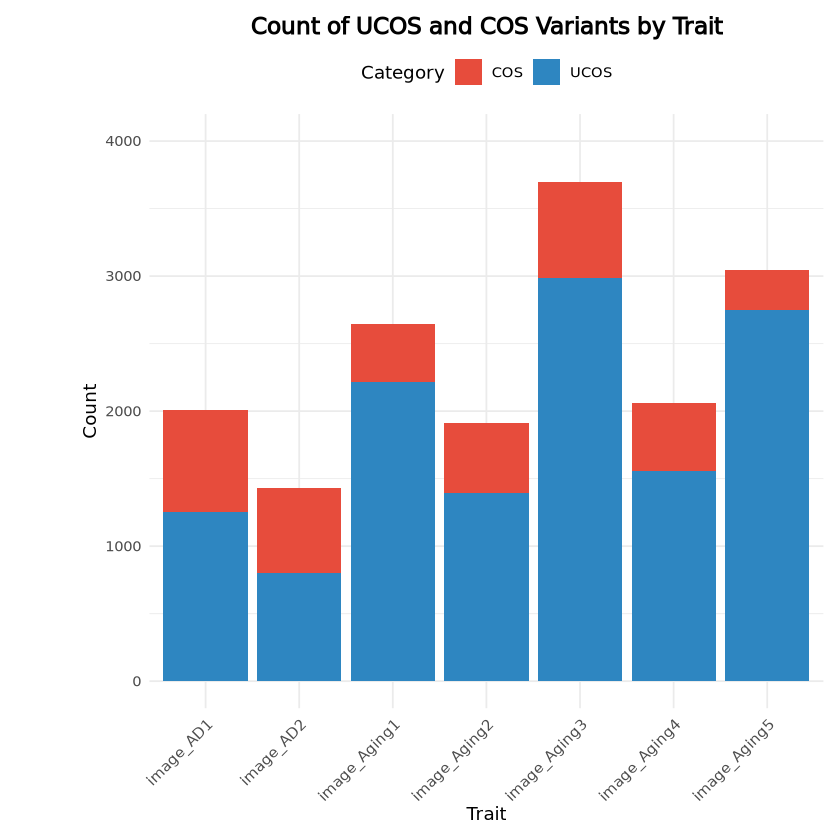

In [15]:
library(stringr)

# Define the traits of interest
traits_of_interest <- c("image_AD1", "image_AD2", "image_Aging1", "image_Aging2", 
                       "image_Aging3", "image_Aging4", "image_Aging5")

# Create the cos dataset (variants with ";" in event_ID)
image_cos <- image_cb[grepl(";", image_cb$event_ID), ]

# Create ucos dataset (variants without ";" in event_ID)
image_ucos <- image_cb[!grepl(";", image_cb$event_ID), ]

# Function to create trait-specific datasets
create_trait_datasets <- function(traits_list) {
  
  # Initialize lists to store results
  trait_counts <- data.frame()
  
  for (trait in traits_list) {
    
    # For UCOS: direct filtering by trait column
    ucos_trait <- image_ucos[image_ucos$event_ID == trait, ]
    ucos_count <- nrow(ucos_trait)
    
    # For COS: check if trait appears as a separate element (split by "; " - note the space!)
    cos_trait <- image_cos[sapply(image_cos$event_ID, function(x) {
      # Split by "; " (semicolon + space) and trim any extra whitespace
      trait_list <- trimws(unlist(strsplit(x, ";")))
      trait %in% trait_list
    }), ]
    cos_count <- nrow(cos_trait)
    
    # Combine counts for this trait
    trait_result <- data.frame(
      trait = trait,
      ucos_count = ucos_count,
      cos_count = cos_count,
      total = ucos_count + cos_count
    )
    
    trait_counts <- rbind(trait_counts, trait_result)
    
    # Print summary for this trait
    cat("Trait:", trait, "\n")
    cat("  UCOS variants:", ucos_count, "\n")
    cat("  COS variants:", cos_count, "\n")
    cat("  Total variants:", ucos_count + cos_count, "\n\n")
  }
  
  return(trait_counts)
}

# Create the trait counts
trait_counts <- create_trait_datasets(traits_of_interest)

# Calculate proportions
trait_counts$ucos_prop <- trait_counts$ucos_count / trait_counts$total
trait_counts$cos_prop <- trait_counts$cos_count / trait_counts$total

# Handle division by zero (when total = 0)
trait_counts$ucos_prop[is.nan(trait_counts$ucos_prop)] <- 0
trait_counts$cos_prop[is.nan(trait_counts$cos_prop)] <- 0

# Reshape data for plotting
plot_data <- trait_counts %>%
  select(trait, ucos_prop, cos_prop) %>%
  pivot_longer(cols = c(ucos_prop, cos_prop), 
               names_to = "category", 
               values_to = "proportion") %>%
  mutate(category = gsub("_prop", "", category))

# Create count data for the second plot
count_data <- trait_counts %>%
  select(trait, ucos_count, cos_count) %>%
  pivot_longer(cols = c(ucos_count, cos_count), 
               names_to = "category", 
               values_to = "count") %>%
  mutate(category = gsub("_count", "", category))

# Create the stacked bar plot (counts) with y-axis limit set to 4000
p_count <- ggplot(count_data, aes(x = trait, y = count, fill = category)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(values = c("ucos" = "#2E86C1", "cos" = "#E74C3C"),
                  labels = c("ucos" = "UCOS", "cos" = "COS")) +
  labs(title = "Count of UCOS and COS Variants by Trait",
       x = "Trait",
       y = "Count",
       fill = "Category") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
        legend.position = "top",
        plot.margin = margin(10, 10, 10, 50)) +
  coord_cartesian(ylim = c(0, 4000))

# Display the plot
print(p_count)

# Optional: Save the plot
ggsave("stacked_barplot_image_cb_variant_count.png", plot = p_count, width = 10, height = 6, dpi = 300)

# Print final summary table
cat("=== FINAL SUMMARY TABLE ===\n")
print(trait_counts)

In [16]:
ucos_count = sum(trait_counts$ucos_count)
cos_count = sum(trait_counts$cos_count)
ucos_count
cos_count

[1] 12966

[1] 3835

### Finemapping

In [17]:
image_finemap <- fread("~/project/image_QTL/DNE_cb_explained_by_xQTL/AI_IMAGE.hg38_all_blocks_with_MS.toploci.bed.gz") |> filter(str_detect(event_ID, "image_"))
head(image_finemap)

chr,pos,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,cs_coverage_0.95_purity0.5,cs_coverage_0.7_purity0.5,cs_coverage_0.5_purity0.5,PIP,region_id,finemap_model
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<dbl>,<chr>,<chr>
10,100564926,A,G,10:100564926:G:A,chr10_100331627_104378781,image_Aging4,0,0,0,NA,NA,NA,0.36683806,chr10_100331627_104378781,single_effect_NO_QC
10,100575906,A,G,10:100575906:G:A,chr10_100331627_104378781,image_Aging4,0,0,0,NA,NA,NA,0.04330213,chr10_100331627_104378781,single_effect_NO_QC
10,101347968,T,G,10:101347968:G:T,chr10_100331627_104378781,image_AD2,0,0,0,NA,NA,NA,0.03783572,chr10_100331627_104378781,single_effect_NO_QC
10,101362465,A,G,10:101362465:G:A,chr10_100331627_104378781,image_AD2,0,0,1,NA,NA,NA,0.04602247,chr10_100331627_104378781,single_effect_NO_QC
10,101392658,A,C,10:101392658:C:A,chr10_100331627_104378781,image_AD2,0,0,1,NA,NA,NA,0.05232448,chr10_100331627_104378781,single_effect_NO_QC
10,101394564,G,A,10:101394564:A:G,chr10_100331627_104378781,image_AD2,0,0,1,NA,NA,NA,0.05709616,chr10_100331627_104378781,single_effect_NO_QC


In [18]:
image_finemap_95 = image_finemap |> filter(cs_coverage_0.95 > 0)

In [19]:
dim(image_finemap)
dim(image_finemap_95)

[1] 17609    16

[1] 2131   16

In [23]:
image_finemap |> count(event_ID,cs_coverage_0.7) |> arrange(desc(n))

event_ID,cs_coverage_0.7,n
<chr>,<int>,<int>
image_AD1,1,2813
image_Aging5,0,1962
image_Aging1,0,1540
image_Aging4,0,1399
image_Aging3,0,1395
image_Aging2,0,1222
image_AD1,0,1219
image_Aging5,1,1166
image_AD2,0,1134


In [22]:
plot_data  = image_finemap |> group_by(event_ID) |> summarize(count = n())
plot_data_95  = image_finemap_95 |> group_by(event_ID) |> summarize(count = n())
plot_data
plot_data_95

pcount_finemap = plot_data |>
  ggplot(aes(x = event_ID, y = count)) +
  geom_col(fill = "#2E86C1") +
  labs(
    title = "Variant Counts from Finemapping by Trait",
    x = "Trait",
    y = "Counts"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    legend.position = "top",
    plot.margin = margin(10, 10, 10, 50)
  ) +
  coord_cartesian(ylim = c(0, 4000))

pcount_finemap_95 = plot_data_95 |>
  ggplot(aes(x = event_ID, y = count)) +
  geom_col(fill = "#2E86C1") +
  labs(
    title = "Variant Counts from Finemapping by Trait",
    x = "Trait",
    y = "Counts"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    legend.position = "top",
    plot.margin = margin(10, 10, 10, 50)
  ) +
  coord_cartesian(ylim = c(0, 4000))

# Optional: Save the plots
ggsave("Histogram_finemap_variant_count.png", plot = pcount_finemap, width = 10, height = 6, dpi = 300)
ggsave("Histogram_finemap_variant_count_0.95.png", plot = pcount_finemap_95, width = 10, height = 6, dpi = 300)

event_ID,count
<chr>,<int>
image_AD1,4032
image_AD2,1791
image_Aging1,2379
image_Aging2,2137
image_Aging3,1895
image_Aging4,2247
image_Aging5,3128


event_ID,count
<chr>,<int>
image_AD1,183
image_AD2,190
image_Aging1,303
image_Aging2,137
image_Aging3,221
image_Aging4,255
image_Aging5,842


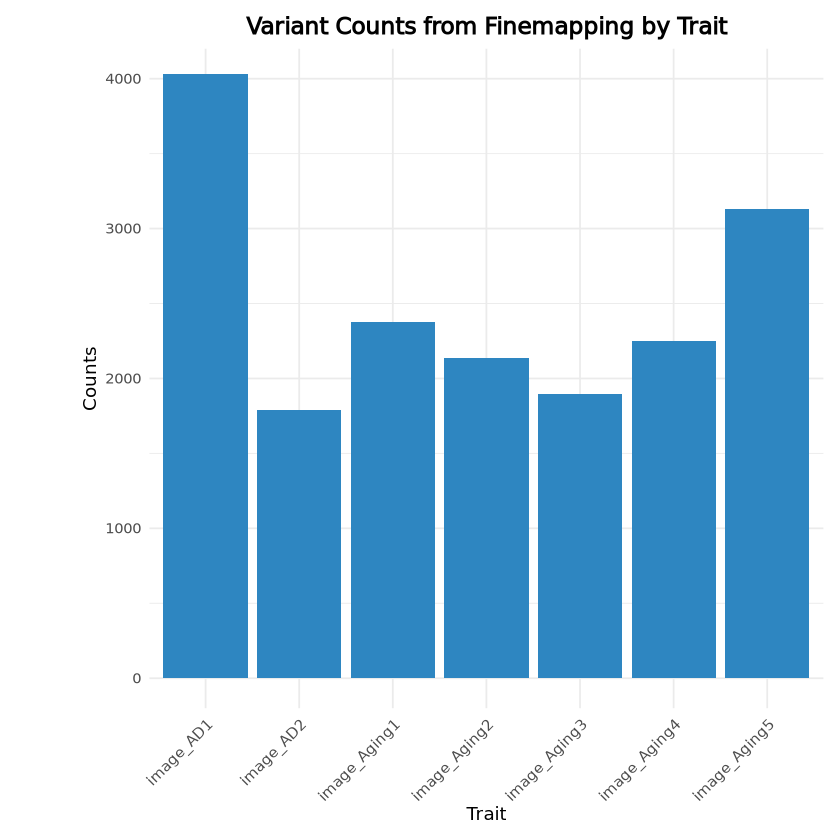

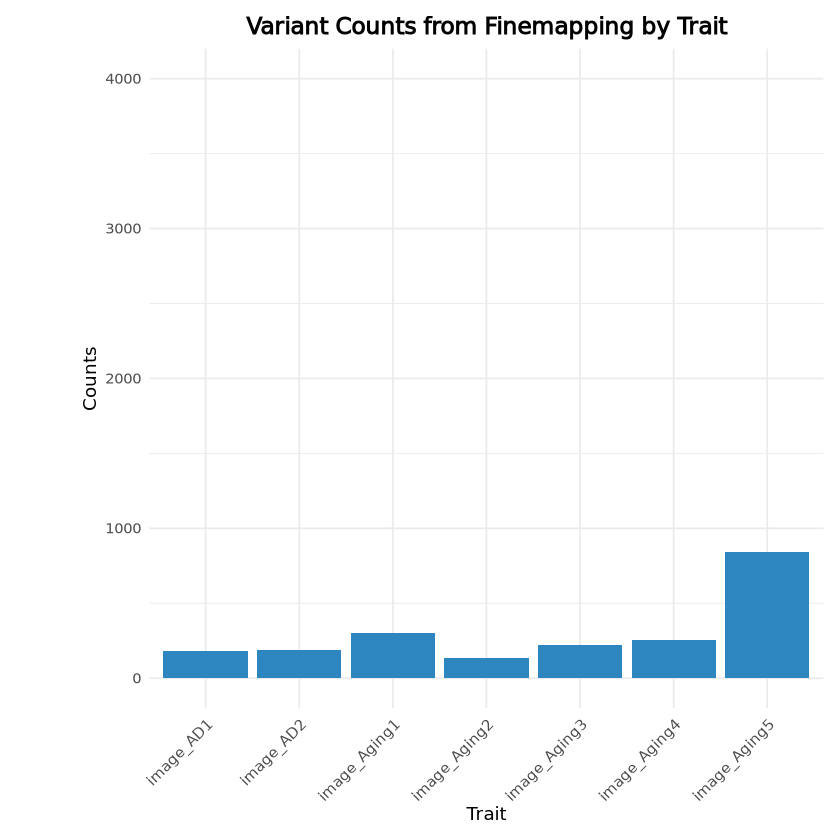

In [8]:
pcount_finemap
pcount_finemap_95

[1] "Summary table:"
# A tibble: 7 × 5
  event_ID     `no CS, PIP > 0.025` `50% CS` `70% CS` `95% CS`
  <chr>                       <int>    <int>    <int>    <int>
1 image_AD1                     743      368     2738      183
2 image_AD2                     690      365      546      190
3 image_Aging1                  894      506      676      303
4 image_Aging2                  827      325      848      137
5 image_Aging3                  675      632      367      221
6 image_Aging4                  772      521      699      255
7 image_Aging5                  772      779      735      842
[1] "Overall variant type distribution:"
         variant_type     n percentage
               <fctr> <int>      <num>
1: no CS, PIP > 0.025  5373      30.51
2:             50% CS  3496      19.85
3:             70% CS  6609      37.53
4:             95% CS  2131      12.10


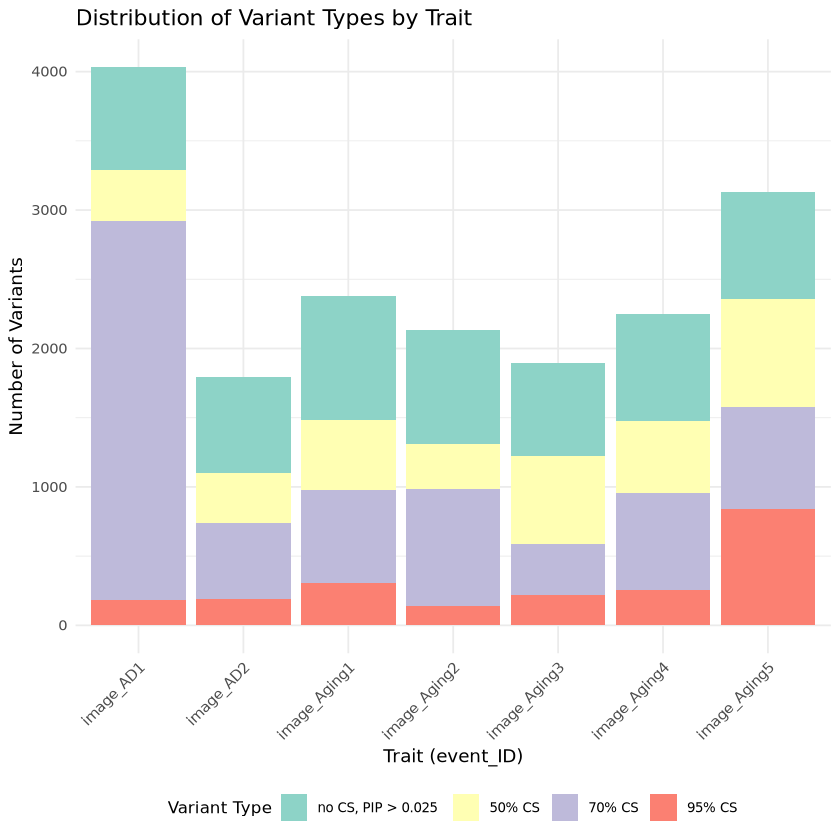

In [29]:
# Load required libraries
library(dplyr)
library(ggplot2)
library(readr)

# Assuming your data is in a dataframe called 'image_finemap'
# If reading from file, uncomment the line below:
# image_finemap <- read_csv("your_file.csv")

# Create variant type classification
image_finemap_classified <- image_finemap %>%
  mutate(
    variant_type = case_when(
      cs_coverage_0.95 > 0 ~ "95% CS",
      cs_coverage_0.95 == 0 & cs_coverage_0.7 > 0 ~ "70% CS",
      cs_coverage_0.95 == 0 & cs_coverage_0.7 == 0 & cs_coverage_0.5 > 0 ~ "50% CS",
      cs_coverage_0.95 == 0 & cs_coverage_0.7 == 0 & cs_coverage_0.5 == 0 ~ "no CS, PIP > 0.025",
      TRUE ~ "Other"  # fallback category
    )
  ) |>
    mutate(
        variant_type = factor(variant_type, 
                     levels = c("no CS, PIP > 0.025",
                                "50% CS",
                                "70% CS", 
                                "95% CS",
                                "Other"))
        )
    

# Count variants by trait and type
variant_counts <- image_finemap_classified %>%
  group_by(event_ID, variant_type) %>%
  summarise(count = n(), .groups = 'drop')

# Create the stacked bar plot
p <- ggplot(variant_counts, aes(x = event_ID, y = count, fill = variant_type)) +
  geom_bar(stat = "identity", position = "stack") +
  labs(
    title = "Distribution of Variant Types by Trait",
    x = "Trait (event_ID)",
    y = "Number of Variants",
    fill = "Variant Type"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    legend.position = "bottom",
    legend.title = element_text(size = 10),
    legend.text = element_text(size = 8)
  ) +
  scale_fill_brewer(type = "qual", palette = "Set3")

# Display the plot
print(p)

# Optional: Save the plot
ggsave("finemap_variant_types_by_trait.png", plot = p, width = 12, height = 8, dpi = 300)

# Summary table showing counts by trait and type
summary_table <- variant_counts %>%
  tidyr::pivot_wider(names_from = variant_type, values_from = count, values_fill = 0)

print("Summary table:")
print(summary_table)

# Overall distribution across all traits
overall_distribution <- image_finemap_classified %>%
  count(variant_type) %>%
  mutate(percentage = round(n/sum(n)*100, 2))

print("Overall variant type distribution:")
print(overall_distribution)

### TWAS

In [15]:
AD1_gene = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/manual_cTWAS_QTL_gene/image_AD1_gene_list.tsv") |> pull(gene_id)
AD2_gene = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/manual_cTWAS_QTL_gene/image_AD2_gene_list.tsv") |> pull(gene_id)
Aging1_gene = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/manual_cTWAS_QTL_gene/image_Aging1_gene_list.tsv") |> pull(gene_id)
Aging2_gene = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/manual_cTWAS_QTL_gene/image_Aging2_gene_list.tsv") |> pull(gene_id)
Aging3_gene = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/manual_cTWAS_QTL_gene/image_Aging3_gene_list.tsv") |> pull(gene_id)
Aging4_gene = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/manual_cTWAS_QTL_gene/image_Aging4_gene_list.tsv") |> pull(gene_id)
Aging5_gene = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/manual_cTWAS_QTL_gene/image_Aging5_gene_list.tsv") |> pull(gene_id)

In [16]:
library(UpSetR)
# Create named list of gene sets
gene_sets <- list(
  "AD1" = AD1_gene,
  "AD2" = AD2_gene, 
  "Aging1" = Aging1_gene,
  "Aging2" = Aging2_gene,
  "Aging3" = Aging3_gene,
  "Aging4" = Aging4_gene,
  "Aging5" = Aging5_gene
)

# Remove any NA values
gene_sets <- lapply(gene_sets, function(x) x[!is.na(x)])
# Convert to binary matrix for UpSet plot
all_genes <- unique(unlist(gene_sets))
upset_data <- data.frame(gene = all_genes)

for(set_name in names(gene_sets)) {
  upset_data[[set_name]] <- upset_data$gene %in% gene_sets[[set_name]]
}
str(gene_sets)
# Convert to proper format for UpSetR
upset_r_data <- upset_data
# Remove the 'gene' column and convert to 0/1 instead of TRUE/FALSE
upset_r_data <- upset_r_data[, -1]  # Remove gene column
upset_r_data <- as.data.frame(lapply(upset_r_data, as.numeric))

# Add row names if needed
rownames(upset_r_data) <- upset_data$gene

# Create UpSetR plot with proper error handling
tryCatch({
  upset_r_plot <- upset(upset_r_data, 
                       sets = names(gene_sets),
                       order.by = "freq",
                       decreasing = TRUE,
                       mb.ratio = c(0.6, 0.4),
                       number.angles = 0,
                       text.scale = 1.2,
                       point.size = 3,
                       line.size = 1.5,
                       mainbar.y.label = "Intersection Size",
                       sets.x.label = "Gene Set Size",
                       sets.bar.color = "steelblue",
                       main.bar.color = "darkblue")
  
  cat("UpSetR plot created successfully\n")
}, error = function(e) {
  cat("UpSetR failed, using alternative method\n")
  
  # Alternative: Create a simple intersection matrix
  intersection_matrix <- matrix(0, nrow = length(unique(DNE$gene_name)), ncol = length(gene_sets))
  rownames(intersection_matrix) <- unique(DNE$gene_name)
  colnames(intersection_matrix) <- names(gene_sets)
  
  for(i in 1:length(gene_sets)) {
    intersection_matrix[unique(DNE$gene_name) %in% gene_sets[[i]], i] <- 1
  }
  
  print(head(intersection_matrix))
})


List of 7
 $ AD1   : chr [1:104] "ENSG00000107882" "ENSG00000107960" "ENSG00000138107" "ENSG00000138111" ...
 $ AD2   : chr [1:134] "ENSG00000110492" "ENSG00000149179" "ENSG00000165912" "ENSG00000110108" ...
 $ Aging1: chr [1:162] "ENSG00000152270" "ENSG00000075188" "ENSG00000111666" "ENSG00000126777" ...
 $ Aging2: chr [1:124] "ENSG00000019995" "ENSG00000107902" "ENSG00000203791" "ENSG00000095787" ...
 $ Aging3: chr [1:90] "ENSG00000187164" "ENSG00000183605" "ENSG00000156076" "ENSG00000131966" ...
 $ Aging4: chr [1:77] "ENSG00000107960" "ENSG00000141002" "ENSG00000185324" "ENSG00000258839" ...
 $ Aging5: chr [1:188] "ENSG00000107957" "ENSG00000138175" "ENSG00000148842" "ENSG00000166272" ...
UpSetR plot created successfully


In [17]:
png("~/xqtl-analysis/production/image_QTL/CB_finemapping_summary/DNE_twas_upset.png", width = 12, height = 8, units = "in", res = 300)
print(upset_r_plot)
dev.off()

agg_record_265148618 
                   2

### TWAS&QTL

In [9]:
ctwas_gene = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/TWAS_QTL_gene_list.tsv")
head(ctwas_gene)

#chr,start,end,gene_id,source,gene_name,event_id
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
chr14,99238297,101760000,ENSG00000100811,TWAS,YY1,image_AD1
chr20,34433347,37080000,ENSG00000125965,TWAS,GDF5,image_AD1
chr3,46413681,50320000,ENSG00000114650,TWAS,SCAP,image_AD1
chr8,9840000,12600000,ENSG00000104643,TWAS,MTMR9,image_AD1
chr10,101673731,103714397,ENSG00000138175,TWAS,ARL3,image_AD1
chr10,101644478,103680000,ENSG00000171206,TWAS,TRIM8,image_AD1


In [11]:
AD1 = ctwas_gene |> filter(str_detect(event_id,"image_AD1"))
AD2 = ctwas_gene |> filter(str_detect(event_id,"image_AD2"))
Aging1 = ctwas_gene |> filter(str_detect(event_id,"image_Aging1"))
Aging2 = ctwas_gene |> filter(str_detect(event_id,"image_Aging2"))
Aging3 = ctwas_gene |> filter(str_detect(event_id,"image_Aging3"))
Aging4 = ctwas_gene |> filter(str_detect(event_id,"image_Aging4"))
Aging5 = ctwas_gene |> filter(str_detect(event_id,"image_Aging5"))
Aging1_gene = Aging1$gene_name |> unique()

Aging2_gene = Aging2$gene_name|> unique()

Aging3_gene = Aging3$gene_name|> unique()

Aging4_gene = Aging4$gene_name|> unique()

Aging5_gene = Aging5$gene_name|> unique()


AD1_gene = AD1$gene_name|> unique()
AD2_gene = AD2$gene_name|> unique()


In [12]:
library(UpSetR)
# Create named list of gene sets
gene_sets <- list(
  "AD1" = AD1_gene,
  "AD2" = AD2_gene, 
  "Aging1" = Aging1_gene,
  "Aging2" = Aging2_gene,
  "Aging3" = Aging3_gene,
  "Aging4" = Aging4_gene,
  "Aging5" = Aging5_gene
)

# Remove any NA values
gene_sets <- lapply(gene_sets, function(x) x[!is.na(x)])
# Convert to binary matrix for UpSet plot
all_genes <- unique(unlist(gene_sets))
upset_data <- data.frame(gene = all_genes)

for(set_name in names(gene_sets)) {
  upset_data[[set_name]] <- upset_data$gene %in% gene_sets[[set_name]]
}
str(gene_sets)
# Convert to proper format for UpSetR
upset_r_data <- upset_data
# Remove the 'gene' column and convert to 0/1 instead of TRUE/FALSE
upset_r_data <- upset_r_data[, -1]  # Remove gene column
upset_r_data <- as.data.frame(lapply(upset_r_data, as.numeric))

# Add row names if needed
rownames(upset_r_data) <- upset_data$gene

# Create UpSetR plot with proper error handling
tryCatch({
  upset_r_plot <- upset(upset_r_data, 
                       sets = names(gene_sets),
                       order.by = "freq",
                       decreasing = TRUE,
                       mb.ratio = c(0.6, 0.4),
                       number.angles = 0,
                       text.scale = 1.2,
                       point.size = 3,
                       line.size = 1.5,
                       mainbar.y.label = "Intersection Size",
                       sets.x.label = "Gene Set Size",
                       sets.bar.color = "steelblue",
                       main.bar.color = "darkblue")
  
  cat("UpSetR plot created successfully\n")
}, error = function(e) {
  cat("UpSetR failed, using alternative method\n")
  
  # Alternative: Create a simple intersection matrix
  intersection_matrix <- matrix(0, nrow = length(unique(DNE$gene_name)), ncol = length(gene_sets))
  rownames(intersection_matrix) <- unique(DNE$gene_name)
  colnames(intersection_matrix) <- names(gene_sets)
  
  for(i in 1:length(gene_sets)) {
    intersection_matrix[unique(DNE$gene_name) %in% gene_sets[[i]], i] <- 1
  }
  
  print(head(intersection_matrix))
})


List of 7
 $ AD1   : chr [1:60] "YY1" "GDF5" "SCAP" "MTMR9" ...
 $ AD2   : chr [1:105] "RASSF3" "LEMD3" "XPOT" "GDF5" ...
 $ Aging1: chr [1:129] "NFATC2IP" "TUFM" "CLN3" "SULT1A1" ...
 $ Aging2: chr [1:84] "TESC" "HRK" "LEMD3" "XPOT" ...
 $ Aging3: chr [1:62] "SPTBN1" "GDPD3" "CENPW" "ARID4A" ...
 $ Aging4: chr [1:51] "RAB29" "PM20D1" "IFIT1B" "KPNA2" ...
 $ Aging5: chr [1:151] "NEURL1" "CNNM2" "AS3MT" "ATP5MC1" ...
UpSetR plot created successfully


In [14]:
png("~/xqtl-analysis/production/image_QTL/CB_finemapping_summary/DNE_twas_qtl_upset.png", width = 12, height = 8, units = "in", res = 300)
print(upset_r_plot)
dev.off()

agg_record_1440846479 
                    2

## All GWAS

### ColocBoost

In [23]:
all_gwas_cb <- fread("~/project/image_QTL/DNE_cb_explained_by_xQTL/Image_AD_aging_PD_meta_colocboost_export_filtered_ucos.bed")
head(all_gwas_cb)

#chr,start,end,a1,a2,variant_ID,region_ID,event_ID,cos_ID,vcp,cos_npc,min_npc_outcome,coef,z
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
chr1,161189357,161189357,T,C,chr1:161189357:C:T,chr1_158933969_162352348,AD_Bellenguez; AD_Wightman_Excluding23andMe_2021,chr1_158933969_162352348:cos1:y7_y10,0.148633848,1,1,-0.00237822429413167;-0.00126943889431771,-5.66666666666667;-5.39920492844837
chr1,161215268,161215268,T,G,chr1:161215268:G:T,chr1_158933969_162352348,AD_Bellenguez; AD_Wightman_Excluding23andMe_2021,chr1_158933969_162352348:cos1:y7_y10,0.213683842,1,1,-0.00314917325108774;-0.0015555119117074,-5.72826086956522;-5.44139840072206
chr1,161217875,161217875,T,C,chr1:161217875:C:T,chr1_158933969_162352348,AD_Bellenguez; AD_Wightman_Excluding23andMe_2021,chr1_158933969_162352348:cos1:y7_y10,0.630037093,1,1,-0.0035129752975932;-0.00589550094118934,-5.71276595744681;-5.78719041195195
chr1,200905600,200905600,G,A,chr1:200905600:A:G,chr1_200496446_202852808,AD_Wightman_Full_2021; AD_Wightman_Excluding23andMe_2021,chr1_200496446_202852808:cos1:y10_y11,0.007671881,1,1,9.234320806912e-05;0.000139149039132946,4.53950141738719;4.29121674501588
chr1,200905967,200905967,C,T,chr1:200905967:T:C,chr1_200496446_202852808,AD_Wightman_Full_2021; AD_Wightman_Excluding23andMe_2021,chr1_200496446_202852808:cos1:y10_y11,0.008368034,1,1,0.000104268954830228;0.000138364785535695,4.58025882916672;4.28441576043348
chr1,200906114,200906114,A,T,chr1:200906114:T:A,chr1_200496446_202852808,AD_Wightman_Full_2021; AD_Wightman_Excluding23andMe_2021,chr1_200496446_202852808:cos1:y10_y11,0.008713429,1,1,0.000107208760913441;0.000142027094052532,4.58984897079625;4.29387534466063


=== FINAL SUMMARY TABLE ===
                                     trait ucos_count cos_count total
1                            AD_Bellenguez        101      1733  1834
2        AD_Wightman_Excluding23andMe_2021        207      1091  1298
3  AD_Wightman_ExcludingUKBand23andME_2021        168      2465  2633
4                    AD_Kunkle_Stage1_2019        571       251   822
5                    AD_Wightman_Full_2021         23      1089  1112
6                                image_AD1       1245       766  2011
7                                image_AD2        799       741  1540
8                             image_Aging1       2370       755  3125
9                             image_Aging2       1469       516  1985
10                            image_Aging3        717      2456  3173
11                            image_Aging4       1192       461  1653
12                            image_Aging5       1983       599  2582
13                            Telomere_pc1       4807       76

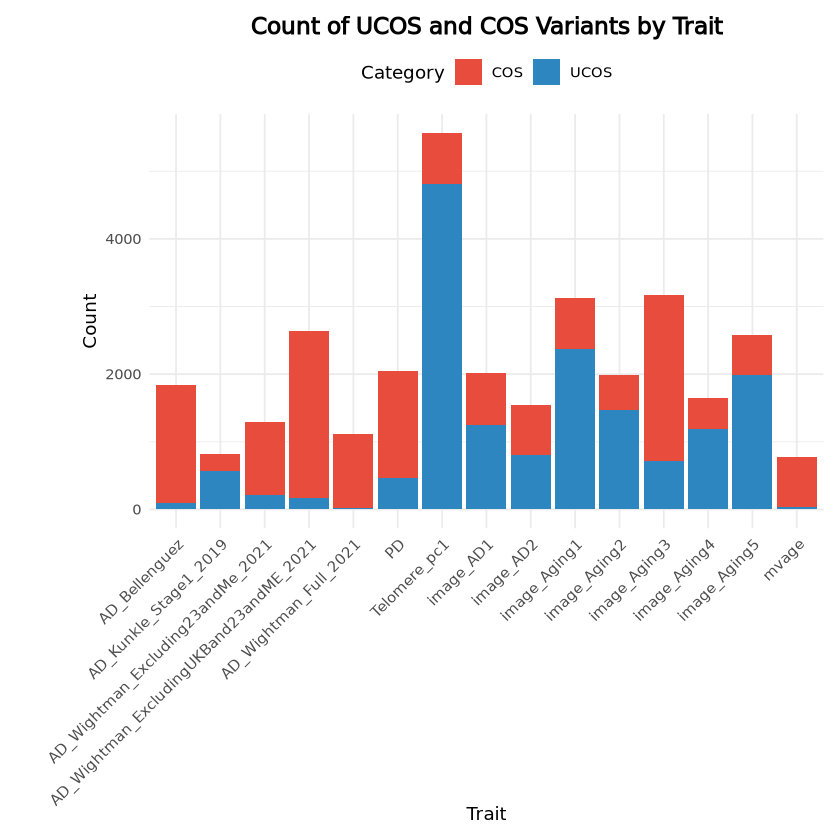

In [24]:

library(stringr)

# Define the traits of interest
traits_of_interest <- c("AD_Bellenguez", "AD_Wightman_Excluding23andMe_2021", "AD_Wightman_ExcludingUKBand23andME_2021",
             "AD_Kunkle_Stage1_2019", "AD_Wightman_Full_2021", "image_AD1", "image_AD2", 
             "image_Aging1", "image_Aging2", "image_Aging3", "image_Aging4","image_Aging5","Telomere_pc1", "mvage", "PD")

# Create the cos dataset (variants with ";" in event_ID)
all_gwas_cos <- all_gwas_cb[grepl(";", all_gwas_cb$event_ID), ]

# Create ucos dataset (variants without ";" in event_ID)
all_gwas_ucos <- all_gwas_cb[!grepl(";", all_gwas_cb$event_ID), ]

# Function to create trait-specific datasets
create_trait_datasets <- function(traits_list) {
  
  # Initialize lists to store results
  trait_counts <- data.frame()
  
  for (trait in traits_list) {
    
    # For UCOS: direct filtering by trait column
    ucos_trait <- all_gwas_ucos[all_gwas_ucos$event_ID == trait, ]
    ucos_count <- nrow(ucos_trait)
    
    # For COS: check if trait appears as a separate element (split by "; " - note the space!)
    cos_trait <- all_gwas_cos[sapply(all_gwas_cos$event_ID, function(x) {
      # Split by "; " (semicolon + space) and trim any extra whitespace
      trait_list <- trimws(unlist(strsplit(x, ";")))
      trait %in% trait_list
    }), ]
    cos_count <- nrow(cos_trait)
    
    # Combine counts for this trait
    trait_result <- data.frame(
      trait = trait,
      ucos_count = ucos_count,
      cos_count = cos_count,
      total = ucos_count + cos_count
    )
    
    trait_counts <- rbind(trait_counts, trait_result)
    
    # Print summary for this trait
    # cat("Trait:", trait, "\n")
    # cat("  UCOS variants:", ucos_count, "\n")
    # cat("  COS variants:", cos_count, "\n")
    # cat("  Total variants:", ucos_count + cos_count, "\n\n")
  }
  
  return(trait_counts)
}

# Create the trait counts
trait_counts <- create_trait_datasets(traits_of_interest)

# Calculate proportions
trait_counts$ucos_prop <- trait_counts$ucos_count / trait_counts$total
trait_counts$cos_prop <- trait_counts$cos_count / trait_counts$total

# Handle division by zero (when total = 0)
trait_counts$ucos_prop[is.nan(trait_counts$ucos_prop)] <- 0
trait_counts$cos_prop[is.nan(trait_counts$cos_prop)] <- 0

# Reshape data for plotting
plot_data <- trait_counts %>%
  select(trait, ucos_prop, cos_prop) %>%
  pivot_longer(cols = c(ucos_prop, cos_prop), 
               names_to = "category", 
               values_to = "proportion") %>%
  mutate(category = gsub("_prop", "", category))

# Create the stacked bar plot (proportions)
# p_prop <- ggplot(plot_data, aes(x = trait, y = proportion, fill = category)) +
#   geom_bar(stat = "identity", position = "stack") +
#   scale_fill_manual(values = c("ucos" = "#2E86C1", "cos" = "#E74C3C"),
#                     labels = c("UCOS", "COS")) +
#   labs(title = "Proportion of UCOS and COS Variants by Trait",
#        x = "Trait",
#        y = "Proportion",
#        fill = "Category") +
#   theme_minimal() +
#   theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
#         plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
#         legend.position = "top",
#         plot.margin = margin(10, 10, 10, 50)) +
#   coord_cartesian(ylim = c(0, 1))

# # Create count data for the second plot
count_data <- trait_counts %>%
  select(trait, ucos_count, cos_count) %>%
  pivot_longer(cols = c(ucos_count, cos_count), 
               names_to = "category", 
               values_to = "count") %>%
  mutate(category = gsub("_count", "", category))

# Create the stacked bar plot (counts)
p_count <- ggplot(count_data, aes(x = trait, y = count, fill = category)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(values = c("ucos" = "#2E86C1", "cos" = "#E74C3C"),
                  labels = c("ucos" = "UCOS", "cos" = "COS")) +
  labs(title = "Count of UCOS and COS Variants by Trait",
       x = "Trait",
       y = "Count",
       fill = "Category") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
        plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
        legend.position = "top",
        plot.margin = margin(10, 10, 10, 50))

# Display both plots
# print(p_prop)
print(p_count)

# Optional: Save the plots
# ggsave("stacked_barplot_traits_proportions.png", plot = p_prop, width = 10, height = 6, dpi = 300)
ggsave("stacked_barplot_all_cb_variant_count.png", plot = p_count, width = 10, height = 6, dpi = 300)

# Print final summary table
cat("=== FINAL SUMMARY TABLE ===\n")
print(trait_counts)


In [80]:
trait_counts

trait,ucos_count,cos_count,total,ucos_prop,cos_prop
<chr>,<int>,<int>,<int>,<dbl>,<dbl>
AD_Bellenguez,101,1733,1834,0.05507088,0.9449291
AD_Wightman_Excluding23andMe_2021,207,1091,1298,0.15947612,0.8405239
AD_Wightman_ExcludingUKBand23andME_2021,168,2465,2633,0.06380555,0.9361945
AD_Kunkle_Stage1_2019,571,251,822,0.69464720,0.3053528
AD_Wightman_Full_2021,23,1089,1112,0.02068345,0.9793165
AD_Bellenguez_EADB,0,0,0,0.00000000,0.0000000
image_AD1,1245,766,2011,0.61909498,0.3809050
image_AD2,799,741,1540,0.51883117,0.4811688
image_Aging1,2370,755,3125,0.75840000,0.2416000


### Finemapping

In [18]:
AD_finemap = fread("~/data/analysis_result/AD_GWAS_finemapping/export/FunGen_xQTL.ADGWAS.Mar25.exported.toploci.bed.gz") |> select(-end, -conditional_effect,-resource,-lfsr,-z) |> rename(pos = start, chr = `#chr`)
TL_finemap = fread("~/project/image_QTL/AD_Aging_PD_GWAS_finemapping/Aging_PD_finemapping/TL.hg38_all_blocks.toploci.bed.gz") |> select(-cs_coverage_0.95_purity0.5, -cs_coverage_0.7_purity0.5, -cs_coverage_0.5_purity0.5, -region_id,-finemap_model)
mvAge_PD_finemap = fread("~/project/image_QTL/AD_Aging_PD_GWAS_finemapping/Aging_PD_finemapping/mvAge_PD.hg38_all_blocks.toploci.bed.gz") |> select(-cs_coverage_0.95_purity0.5, -cs_coverage_0.7_purity0.5, -cs_coverage_0.5_purity0.5, -region_id,-finemap_model)

In [19]:
head(AD_finemap)

chr,pos,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,PIP
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,161125043,T,C,chr1:161125044:C:T,chr1_158933969_162352348,AD_Bellenguez_2022,0,0,0,0.008041456
1,161128337,T,C,chr1:161128338:C:T,chr1_158933969_162352348,AD_Bellenguez_2022,0,0,0,0.005291926
1,161132099,C,A,chr1:161132100:A:C,chr1_158933969_162352348,AD_Bellenguez_2022,0,0,0,0.006715654
1,161133654,G,T,chr1:161133655:T:G,chr1_158933969_162352348,AD_Bellenguez_2022,0,0,0,0.068137617
1,161134668,C,T,chr1:161134669:T:C,chr1_158933969_162352348,AD_Bellenguez_2022,0,0,0,0.006325985
1,161136563,G,T,chr1:161136564:T:G,chr1_158933969_162352348,AD_Bellenguez_2022,0,0,0,0.081955277


In [20]:
head(TL_finemap)

chr,pos,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,PIP
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
10,101427081,A,G,10:101427081:G:A,chr10_100331627_104378781,Longevity,0,0,0,0.03063806
10,101915653,A,T,10:101915653:T:A,chr10_100331627_104378781,Longevity,0,0,0,0.04511331
10,102177487,T,C,10:102177487:C:T,chr10_100331627_104378781,Telomere-pc1,0,3,3,0.94573799
10,103713309,G,C,10:103713309:C:G,chr10_100331627_104378781,Telomere-pc2,0,0,0,0.02544373
10,103713480,G,C,10:103713480:C:G,chr10_100331627_104378781,Telomere-pc2,0,0,0,0.02521516
10,103824401,A,G,10:103824401:G:A,chr10_100331627_104378781,Longevity,0,0,0,0.05641123


In [21]:
image_finemap <- fread("~/project/image_QTL/DNE_cb_explained_by_xQTL/AI_IMAGE.hg38_all_blocks_with_MS.toploci.bed.gz") |> select(-cs_coverage_0.95_purity0.5, -cs_coverage_0.7_purity0.5, -cs_coverage_0.5_purity0.5, -region_id,-finemap_model) |> filter(str_detect(event_ID, "image_"))
all_gwas_finemap = rbind(AD_finemap, TL_finemap, mvAge_PD_finemap)
head(all_gwas_finemap)
dim(all_gwas_finemap)

chr,pos,a1,a2,variant_ID,gene_ID,event_ID,cs_coverage_0.95,cs_coverage_0.7,cs_coverage_0.5,PIP
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<dbl>
1,161125043,T,C,chr1:161125044:C:T,chr1_158933969_162352348,AD_Bellenguez_2022,0,0,0,0.008041456
1,161128337,T,C,chr1:161128338:C:T,chr1_158933969_162352348,AD_Bellenguez_2022,0,0,0,0.005291926
1,161132099,C,A,chr1:161132100:A:C,chr1_158933969_162352348,AD_Bellenguez_2022,0,0,0,0.006715654
1,161133654,G,T,chr1:161133655:T:G,chr1_158933969_162352348,AD_Bellenguez_2022,0,0,0,0.068137617
1,161134668,C,T,chr1:161134669:T:C,chr1_158933969_162352348,AD_Bellenguez_2022,0,0,0,0.006325985
1,161136563,G,T,chr1:161136564:T:G,chr1_158933969_162352348,AD_Bellenguez_2022,0,0,0,0.081955277


[1] 41508    11

In [22]:
all_gwas_finemap_95 = all_gwas_finemap |> filter(cs_coverage_0.95 > 0)

In [23]:
plot_data  = all_gwas_finemap |> group_by(event_ID) |> summarize(count = n())
plot_data_95  = all_gwas_finemap_95 |> group_by(event_ID) |> summarize(count = n())
head(plot_data)
head(plot_data_95)

pcount_finemap = plot_data |>
  ggplot(aes(x = event_ID, y = count)) +
  geom_col(fill = "#2E86C1") +
  labs(
    title = "Variant Counts from Finemapping by Trait",
    x = "Trait",
    y = "Counts"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    legend.position = "top",
    plot.margin = margin(10, 10, 10, 50)
  ) +
  coord_cartesian(ylim = c(0, 4000))

pcount_finemap_95 = plot_data_95 |>
  ggplot(aes(x = event_ID, y = count)) +
  geom_col(fill = "#2E86C1") +
  labs(
    title = "Variant Counts from Finemapping by Trait",
    x = "Trait",
    y = "Counts"
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 9),
    plot.title = element_text(hjust = 0.5, size = 14, face = "bold"),
    legend.position = "top",
    plot.margin = margin(10, 10, 10, 50)
  ) +
  coord_cartesian(ylim = c(0, 4000))

# Optional: Save the plots
ggsave("Histogram_all_finemap_variant_count.png", plot = pcount_finemap, width = 10, height = 6, dpi = 300)
ggsave("Histogram_all_finemap_variant_count_0.95.png", plot = pcount_finemap_95, width = 10, height = 6, dpi = 300)

event_ID,count
<chr>,<int>
AD_Bellenguez_2022,3682
AD_Bellenguez_EADB_2022,3486
AD_Bellenguez_EADI_2022,3981
AD_Jansen_2021,1310
AD_Kunkle_Stage1_2019,669
AD_Wightman_Excluding23andMe_2021,3852


event_ID,count
<chr>,<int>
AD_Bellenguez_2022,1240
AD_Bellenguez_EADB_2022,196
AD_Bellenguez_EADI_2022,11
AD_Jansen_2021,192
AD_Kunkle_Stage1_2019,61
AD_Wightman_Excluding23andMe_2021,285


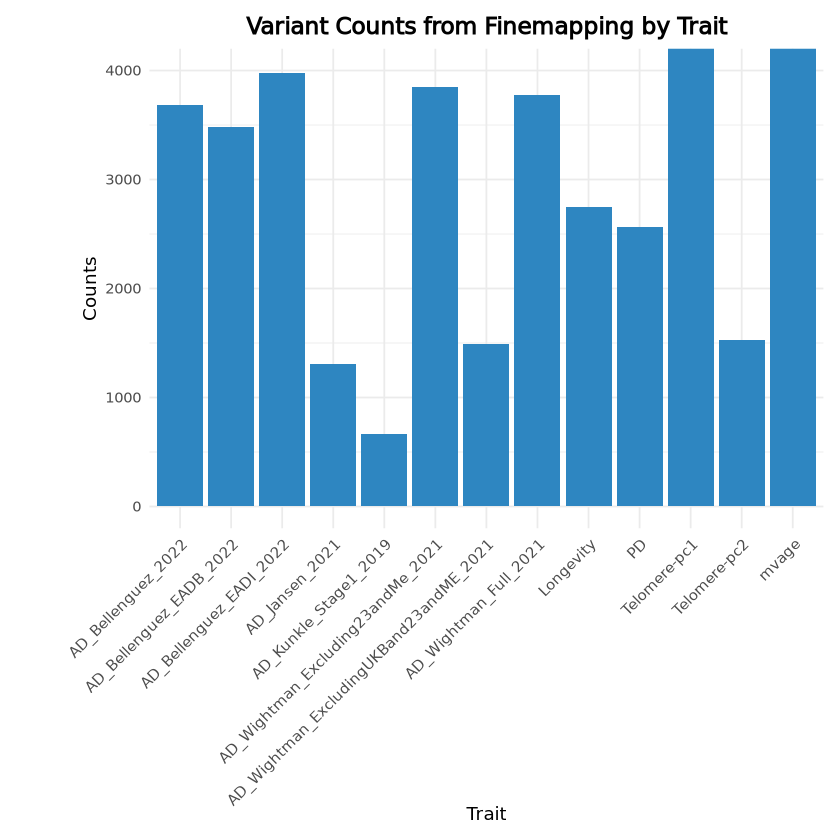

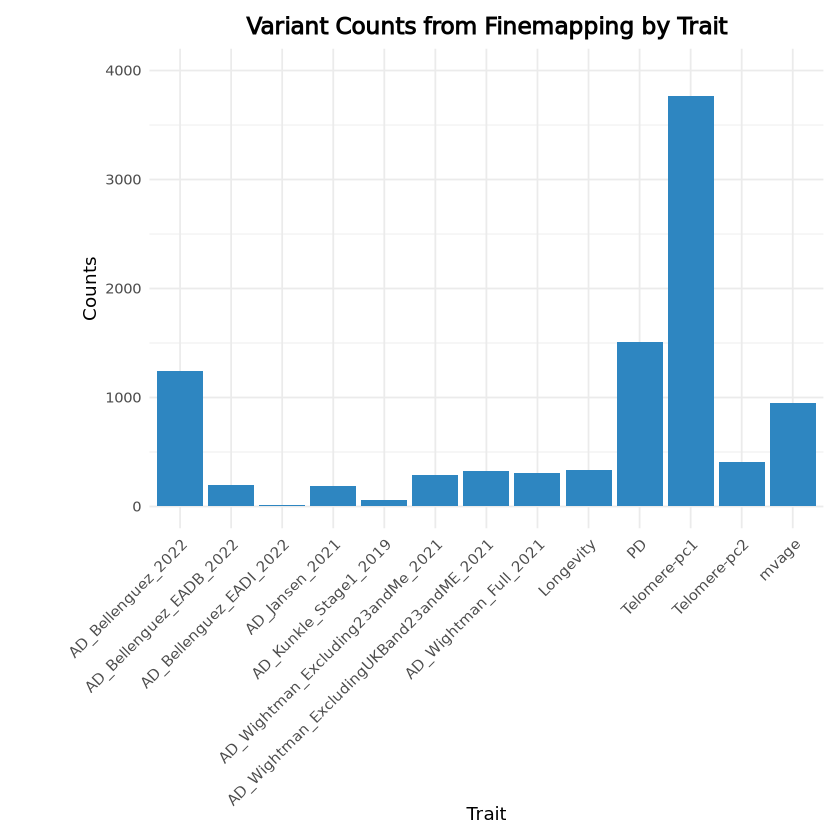

In [24]:
pcount_finemap
pcount_finemap_95

### Upset gene plot

In [27]:
library(dplyr)

In [3]:
ctwas_gene = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/TWAS_QTL_gene_list.tsv")
head(ctwas_gene)

#chr,start,end,gene_id,source,gene_name,event_id
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>
chr14,99238297,101760000,ENSG00000100811,TWAS,YY1,image_AD1
chr20,34433347,37080000,ENSG00000125965,TWAS,GDF5,image_AD1
chr3,46413681,50320000,ENSG00000114650,TWAS,SCAP,image_AD1
chr8,9840000,12600000,ENSG00000104643,TWAS,MTMR9,image_AD1
chr10,101673731,103714397,ENSG00000138175,TWAS,ARL3,image_AD1
chr10,101644478,103680000,ENSG00000171206,TWAS,TRIM8,image_AD1


In [72]:
head(upset_r_data_shared)

,AD1,AD2,Aging1,Aging2,Aging3,Aging4,Aging5,AD,Telomere_Length_PC1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AADAT,0,0,0,0,0,0,0,1,1
AAK1,0,0,0,0,0,0,0,1,1
ABCB9,0,0,0,0,0,0,0,1,1
ABCG2,0,0,0,0,0,0,0,1,1
ABHD12,0,0,0,0,0,0,0,1,1
ABHD3,0,0,0,0,0,0,0,1,1


In [4]:
AD1 = ctwas_gene |> filter(str_detect(event_id,"image_AD1"))
AD2 = ctwas_gene |> filter(str_detect(event_id,"image_AD2"))
Aging1 = ctwas_gene |> filter(str_detect(event_id,"image_Aging1"))
Aging2 = ctwas_gene |> filter(str_detect(event_id,"image_Aging2"))
Aging3 = ctwas_gene |> filter(str_detect(event_id,"image_Aging3"))
Aging4 = ctwas_gene |> filter(str_detect(event_id,"image_Aging4"))
Aging5 = ctwas_gene |> filter(str_detect(event_id,"image_Aging5"))
TL1 = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/TL1_mr_gene_list.gene_list.tsv")
AD = fread("~/xqtl-analysis/production/image_QTL/interested_genes/TWAS_QTL/AD_mr_gene_list.gene_list.tsv")


Aging1_gene = Aging1$gene_name |> unique()

Aging2_gene = Aging2$gene_name|> unique()

Aging3_gene = Aging3$gene_name|> unique()

Aging4_gene = Aging4$gene_name|> unique()

Aging5_gene = Aging5$gene_name|> unique()
TL1_gene = TL1$gene_name|> unique()
AD_gene = AD$gene_name|> unique()


AD1_gene = AD1$gene_name|> unique()
AD2_gene = AD2$gene_name|> unique()


In [18]:
library(UpSetR)

# Create named list of gene sets
gene_sets <- list(
  "AD1" = AD1_gene,
  "AD2" = AD2_gene, 
  "Aging1" = Aging1_gene,
  "Aging2" = Aging2_gene,
  "Aging3" = Aging3_gene,
  "Aging4" = Aging4_gene,
  "Aging5" = Aging5_gene,
  "AD" = AD_gene,
  "Telomere_Length_PC1" = TL1_gene
)

# Remove any NA values
gene_sets <- lapply(gene_sets, function(x) x[!is.na(x)])

# Find genes that appear in at least 2 sets (shared genes)
all_genes <- unique(unlist(gene_sets))
gene_counts <- table(unlist(gene_sets))
shared_genes <- names(gene_counts[gene_counts >= 2])

cat("Total unique genes:", length(all_genes), "\n")
cat("Shared genes (in ≥2 sets):", length(shared_genes), "\n")

# Filter gene sets to only include shared genes
gene_sets_shared <- lapply(gene_sets, function(x) x[x %in% shared_genes])

# Remove empty sets after filtering
gene_sets_shared <- gene_sets_shared[lengths(gene_sets_shared) > 0]

str(gene_sets_shared)

# Convert to binary matrix for UpSet plot (shared genes only)
upset_data_shared <- data.frame(gene = shared_genes)
for(set_name in names(gene_sets_shared)) {
  upset_data_shared[[set_name]] <- upset_data_shared$gene %in% gene_sets_shared[[set_name]]
}

# Convert to proper format for UpSetR
upset_r_data_shared <- upset_data_shared
# Remove the 'gene' column and convert to 0/1 instead of TRUE/FALSE
upset_r_data_shared <- upset_r_data_shared[, -1]  # Remove gene column
upset_r_data_shared <- as.data.frame(lapply(upset_r_data_shared, as.numeric))
# Add row names
rownames(upset_r_data_shared) <- upset_data_shared$gene

# First, let's check the intersection sizes to determine the ranges
intersection_sizes <- c()
for(i in 1:nrow(upset_r_data_shared)) {
  size <- sum(upset_r_data_shared[i,])
  if(size > 1) {  # Only count actual intersections
    intersection_sizes <- c(intersection_sizes, size)
  }
}

cat("Range of intersection sizes:", min(intersection_sizes), "to", max(intersection_sizes), "\n")
cat("Intersections below 100:", sum(intersection_sizes < 100), "\n")
cat("Intersections above 1000:", sum(intersection_sizes > 1000), "\n")
cat("Intersections between 100-1000:", sum(intersection_sizes >= 100 & intersection_sizes <= 1000), "\n")

# Create UpSetR plot for small intersections (< 100)
tryCatch({
  cat("\n=== Creating plot for small intersections (< 100) ===\n")
  upset_r_plot_small <- upset(upset_r_data_shared, 
                              sets = names(gene_sets_shared),
                              order.by = "freq",
                              decreasing = TRUE,
                              mb.ratio = c(0.6, 0.4),
                              number.angles = 0,
                              text.scale = 1.2,
                              point.size = 3,
                              line.size = 1.5,
                              mainbar.y.label = "Small Intersections",
                              sets.x.label = "Shared Gene Set Size",
                              sets.bar.color = "steelblue",
                              main.bar.color = "darkblue",
                              set_size.show = TRUE,
                              mainbar.y.max = 80)
  
  cat("Small intersections plot created successfully\n")
}, error = function(e) {
  cat("Error creating small intersections plot:", e$message, "\n")
})

# # Create UpSetR plot for large intersections (> 1000)  
# tryCatch({
#   cat("\n=== Creating plot for large intersections (> 1000) ===\n")
#   upset_r_plot_large <- upset(upset_r_data_shared, 
#                               sets = names(gene_sets_shared),
#                               order.by = "freq",
#                               decreasing = TRUE,
#                               mb.ratio = c(0.6, 0.4),
#                               number.angles = 0,
#                               text.scale = 1.2,
#                               point.size = 3,
#                               line.size = 1.5,
#                               mainbar.y.label = "Large Intersections (> 1000)",
#                               sets.x.label = "Shared Gene Set Size",
#                               sets.bar.color = "steelblue",
#                               main.bar.color = "darkred",
#                               set_size.show = TRUE,
#                               mainbar.y.min = 1001)
  
#   cat("Large intersections plot created successfully\n")
# }, error = function(e) {
#   cat("Error creating large intersections plot:", e$message, "\n")
# })
  
#   cat("UpSetR plot for shared genes created successfully\n")
# }, error = function(e) {
# # Alternative method if UpSetR fails
# if(exists("upset_r_plot_small") || exists("upset_r_plot_large")) {
#   cat("At least one UpSet plot was created successfully\n")
# } else {
#   cat("UpSetR failed, using alternative method for shared genes\n")
  
#   # Alternative: Create a simple intersection matrix for shared genes only
#   intersection_matrix_shared <- matrix(0, nrow = length(shared_genes), ncol = length(gene_sets_shared))
#   rownames(intersection_matrix_shared) <- shared_genes
#   colnames(intersection_matrix_shared) <- names(gene_sets_shared)
  
#   for(i in 1:length(gene_sets_shared)) {
#     intersection_matrix_shared[shared_genes %in% gene_sets_shared[[i]], i] <- 1
#   }
  
#   print("Shared genes intersection matrix:")
#   print(head(intersection_matrix_shared))
  
#   # Print summary statistics
#   cat("Summary of shared genes across sets:\n")
#   print(colSums(intersection_matrix_shared))
# }

# Optional: Print the shared genes for inspection
cat("\nShared genes found:\n")
print(head(shared_genes, 20))  # Show first 20 shared genes

Total unique genes: 7707 
Shared genes (in ≥2 sets): 1512 
List of 9
 $ AD1                : chr [1:42] "GDF5" "SCAP" "ARL3" "TRIM8" ...
 $ AD2                : chr [1:79] "LEMD3" "XPOT" "GDF5" "ECEL1" ...
 $ Aging1             : chr [1:77] "NFATC2IP" "TUFM" "CLN3" "SULT1A1" ...
 $ Aging2             : chr [1:62] "TESC" "LEMD3" "XPOT" "YPEL3" ...
 $ Aging3             : chr [1:51] "SPTBN1" "GDPD3" "CENPW" "ARID4A" ...
 $ Aging4             : chr [1:31] "PM20D1" "KPNA2" "UPK1A" "CFAP74" ...
 $ Aging5             : chr [1:97] "CNNM2" "AS3MT" "CAPN12" "TMCC2" ...
 $ AD                 : chr [1:1385] "AGRN" "C1orf159" "CFAP74" "PRKCZ" ...
 $ Telomere_Length_PC1: chr [1:1344] "AGRN" "C1orf159" "ARHGEF16" "MEGF6" ...
Range of intersection sizes: 2 to 5 
Intersections below 100: 1512 
Intersections above 1000: 0 
Intersections between 100-1000: 0 

=== Creating plot for small intersections (< 100) ===


Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_text()`).”


Small intersections plot created successfully

Shared genes found:
 [1] "AADAT"      "AAK1"       "ABCB9"      "ABCG2"      "ABHD12"    
 [6] "ABHD3"      "AC002310.4" "AC003002.2" "AC003688.1" "AC004687.2"
[11] "AC006254.1" "AC007375.2" "AC008695.1" "AC025165.3" "AC026786.1"
[16] "AC068234.1" "AC069368.1" "AC078815.1" "AC079447.1" "AC079594.1"


In [19]:
png("~/xqtl-analysis/production/image_QTL/CB_finemapping_summary/DNE_endpoint_twas_qtl_upset.png", width = 12, height = 8, units = "in", res = 300)
print(upset_r_plot_small)
dev.off()

agg_record_436853613 
                   2

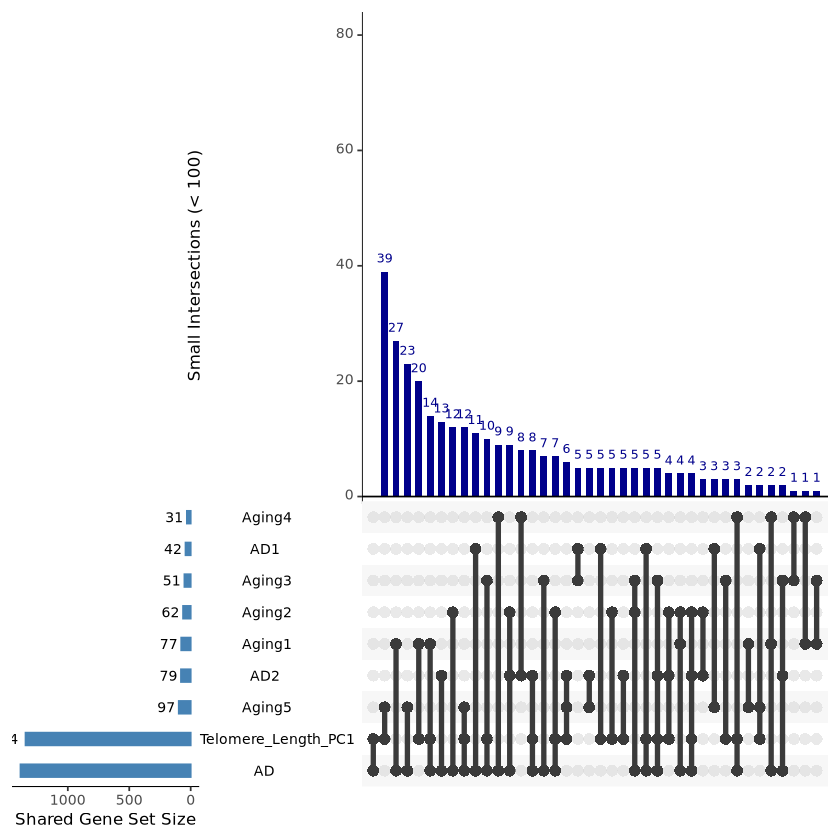

In [16]:
print(upset_r_plot_small)